In [65]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [67]:
#Cargamos el dataset y mostramos las 2 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [69]:
# Verificamos la dimensión del dataset
data.shape

(1599, 12)

In [71]:
# obtenemos datos e4stadísticos de las columnas
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [73]:
# Verificamos datos nulos
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

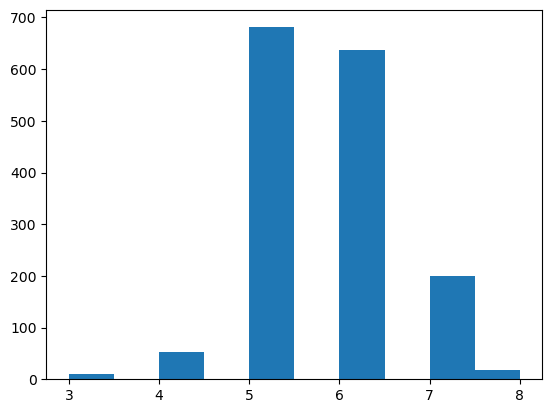

In [75]:
# Histograma de elementos por cada calificación de calidad
plt.hist(data.quality)

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

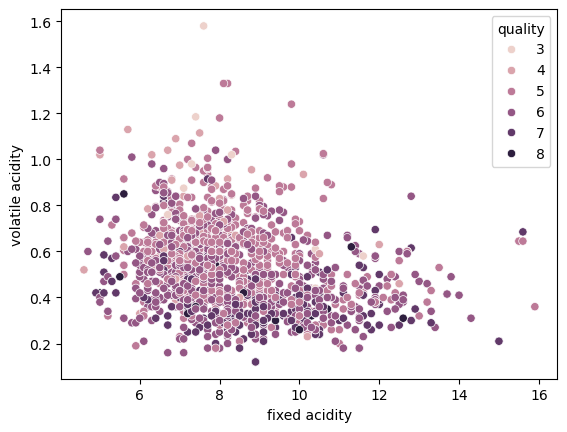

In [77]:
# Diagrama de dispersión observando el comportamiento de dos variables respecto a la calidad del vino
sns.scatterplot(x = "fixed acidity", y = "volatile acidity", hue = "quality", data = data)

<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

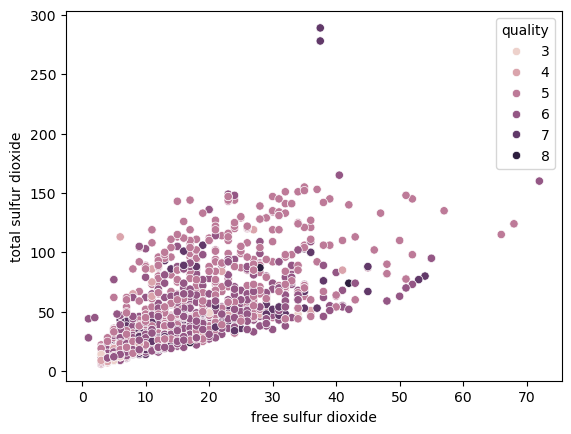

In [79]:
# Diagrama de dispersión observando el comportamiento de dos variables respecto a la calidad del vino
sns.scatterplot(x = "free sulfur dioxide", y = "total sulfur dioxide", hue = "quality", data = data)

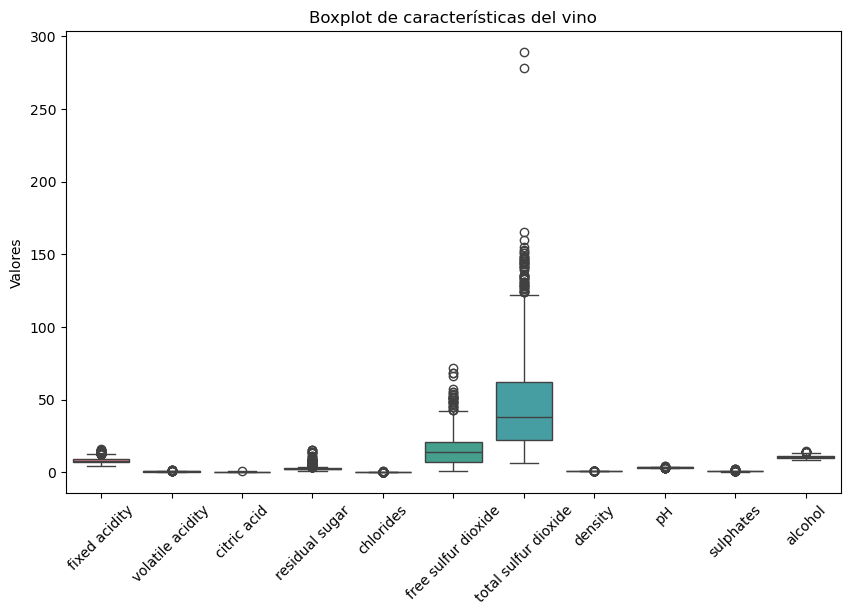

In [81]:
# Identificar valores atípicos de todas las columnas
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

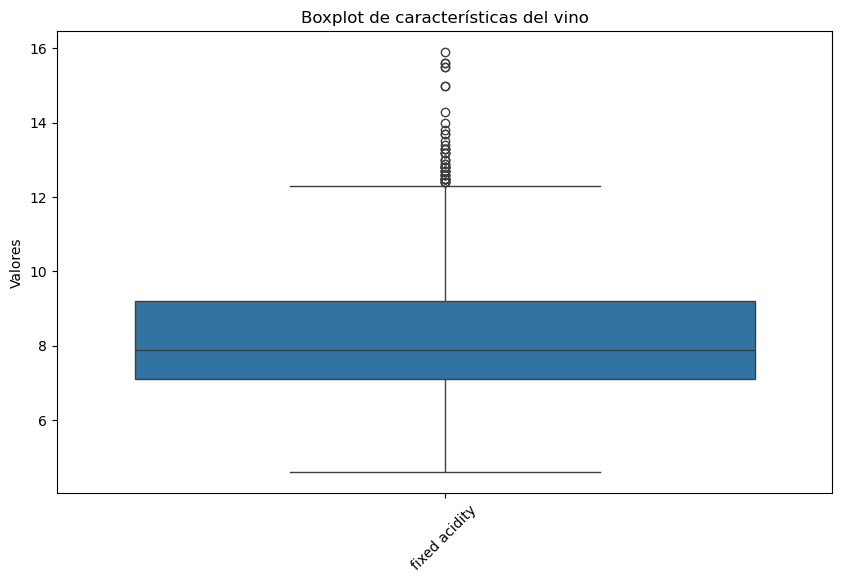

In [83]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

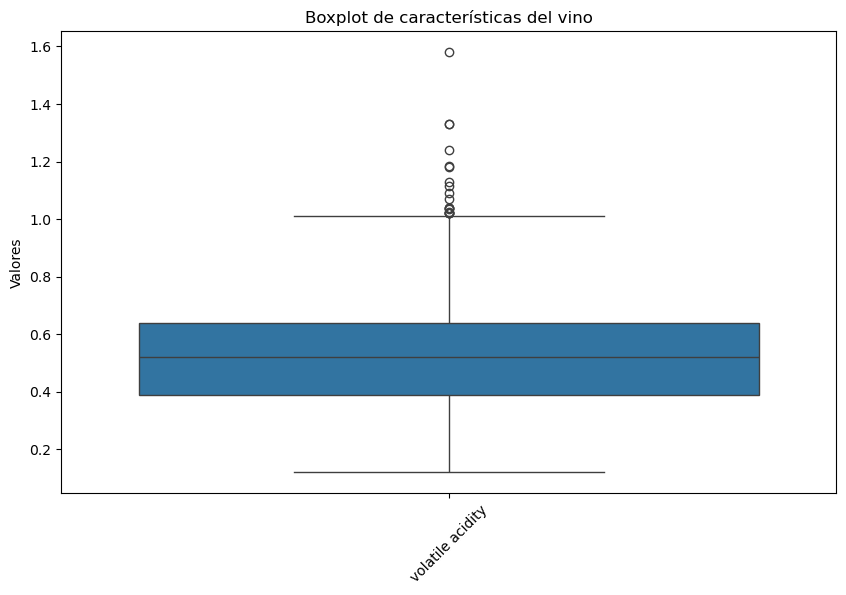

In [124]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['volatile acidity']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

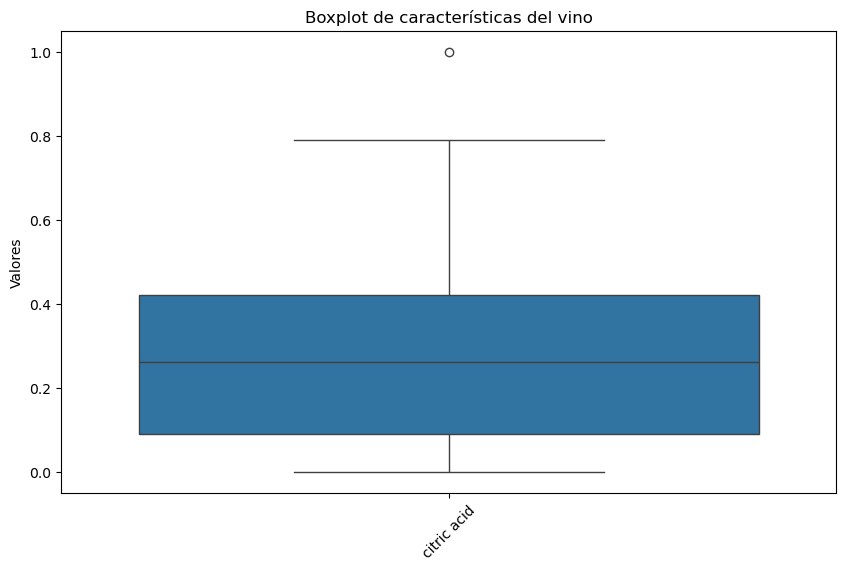

In [126]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['citric acid']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

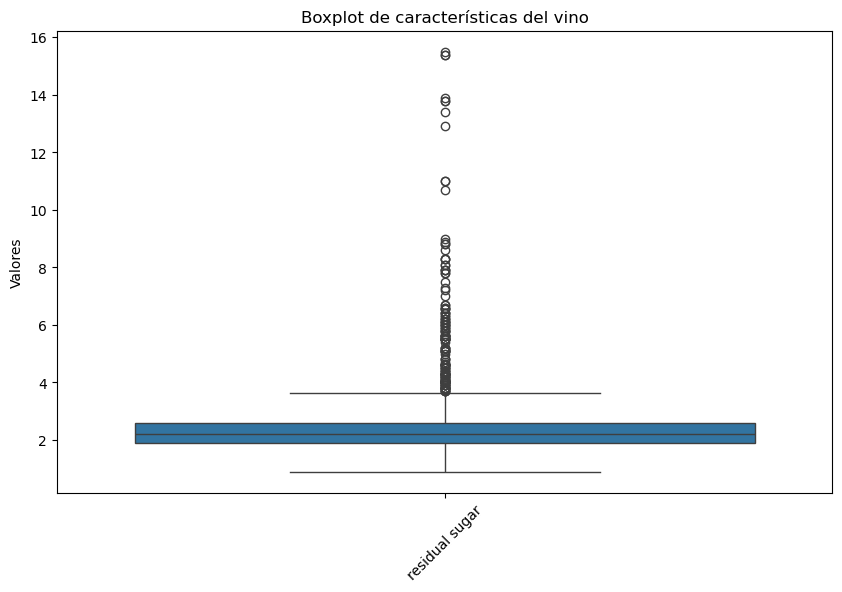

In [128]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['residual sugar']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

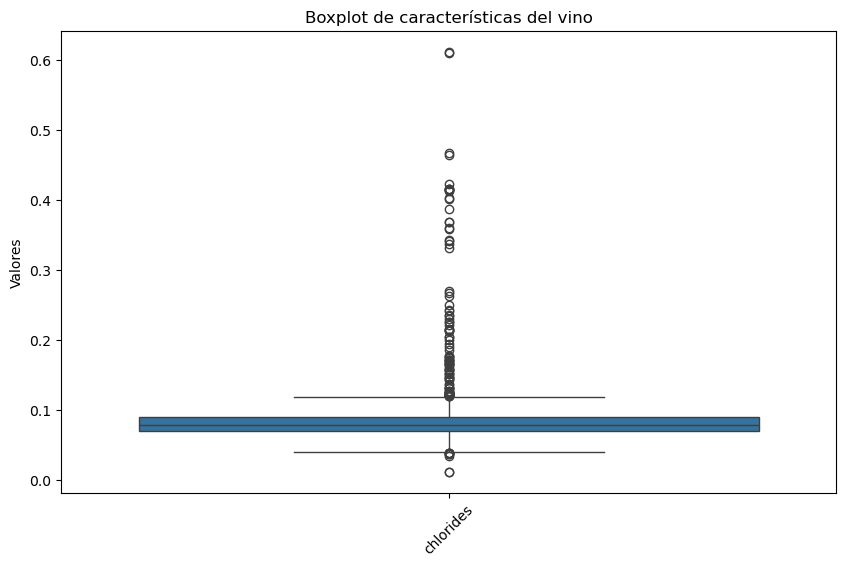

In [130]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['chlorides']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

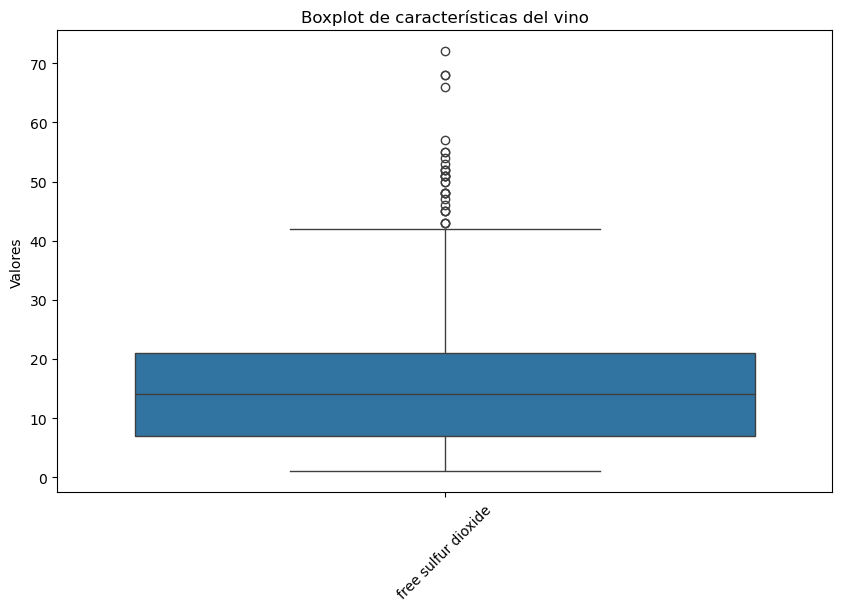

In [132]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['free sulfur dioxide']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

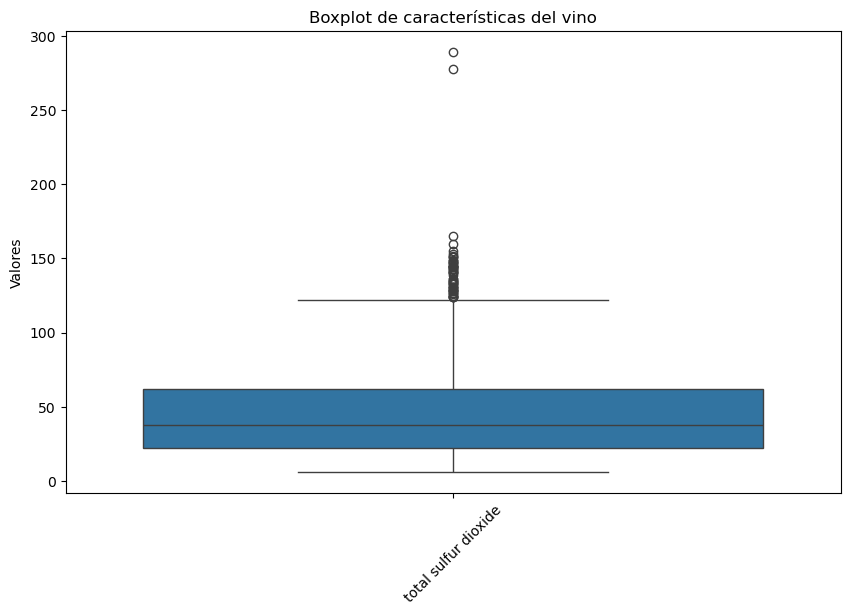

In [134]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['total sulfur dioxide']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

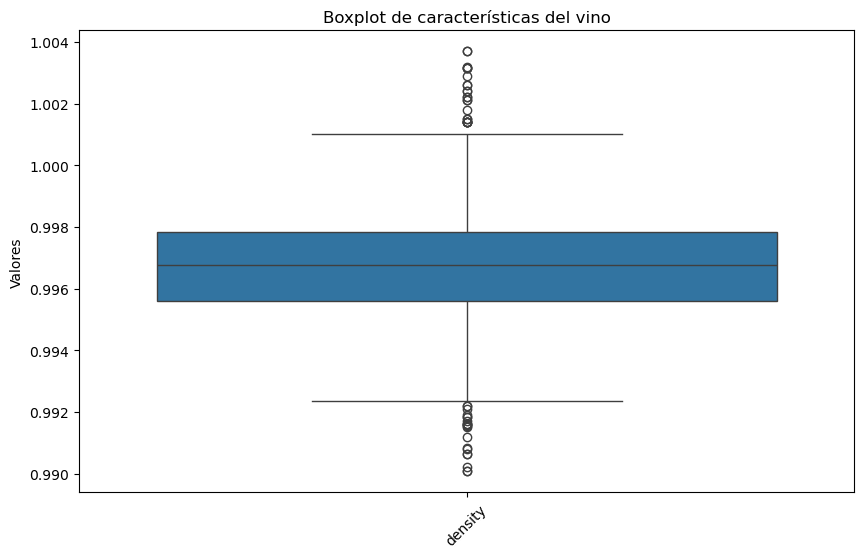

In [136]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['density']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

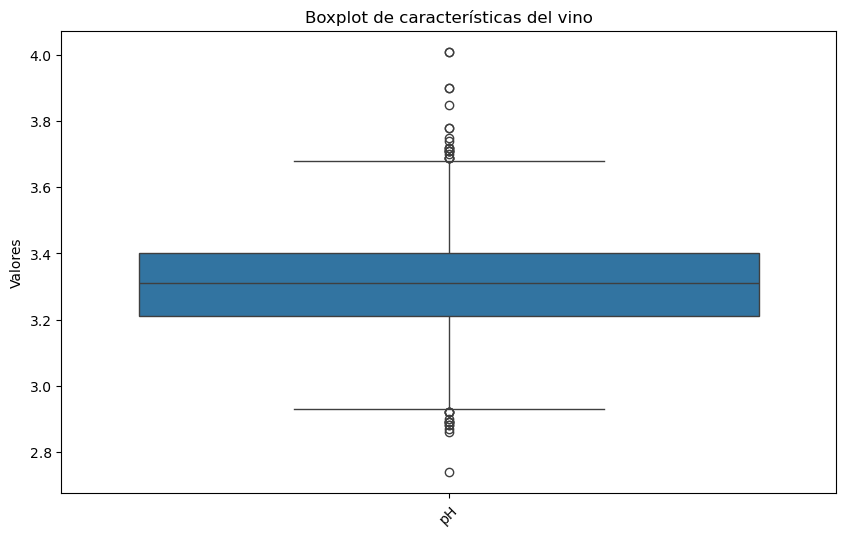

In [138]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['pH']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

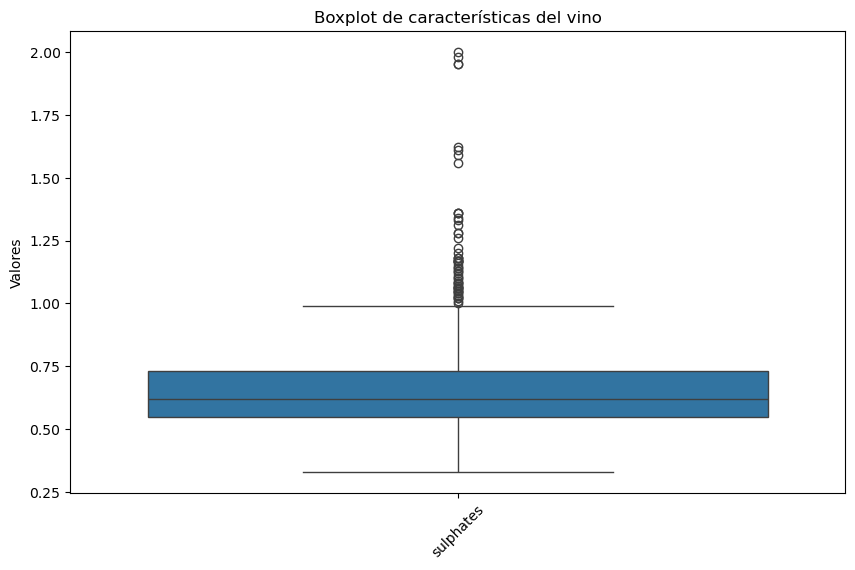

In [140]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['sulphates']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

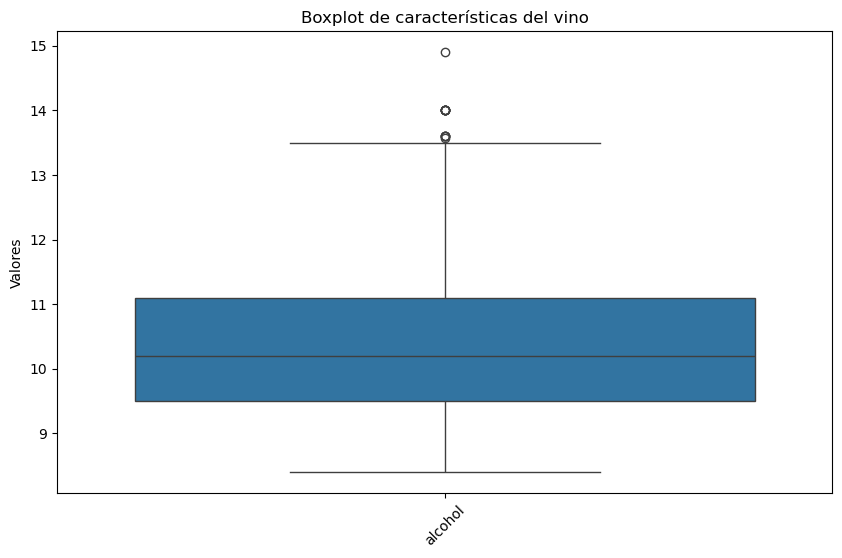

In [142]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

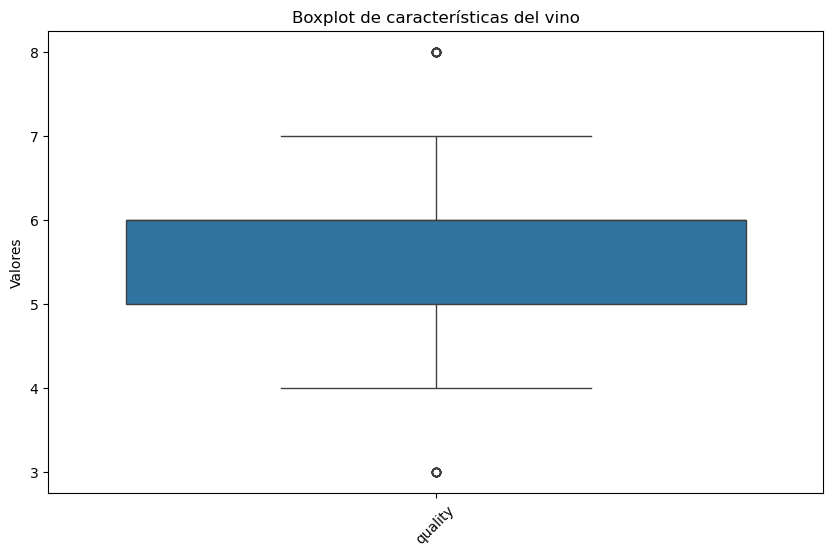

In [144]:
#Identificar valores atípicos de columnas específicas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['quality']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del vino')
plt.ylabel('Valores')
plt.show()

In [85]:
#Establecer las variables predictoras y variable objetivo
predictors_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target_col = ['quality']

In [87]:
#Definir las varibales para las predicciones y la variable objetivo
predictors = data[predictors_col]
target = data[target_col]

In [89]:
#Visualizar los datos para las predicciones
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [91]:
#Visualizar los datos de la variable objetivo
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [93]:
#Identificar la correlación entre variables predictoras
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


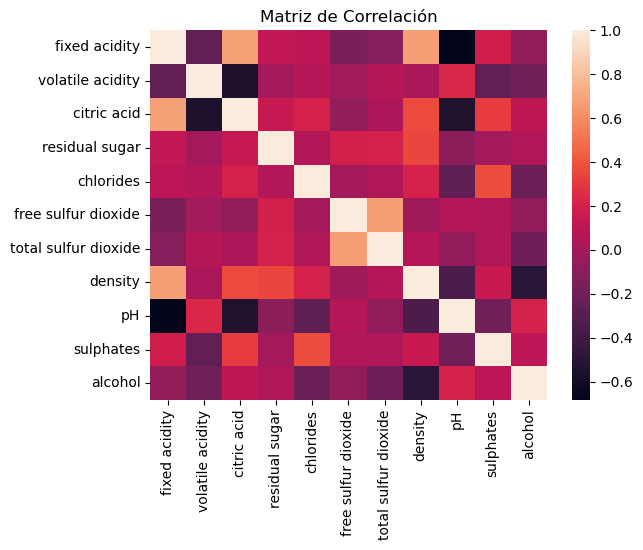

In [95]:
#Correlación entre variables de forma gráfica en matriz de correlación
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [97]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [99]:
#Verificar representación de las clases en los arrays
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([3, 4, 5, 6, 7, 8], dtype=int64), array([  8,  42, 546, 496, 172,  15], dtype=int64))
(array([3, 4, 5, 6, 7, 8], dtype=int64), array([  2,  11, 135, 142,  27,   3], dtype=int64))


In [101]:
# Creación del modelode árbol de decisión 
tree = DecisionTreeClassifier()

In [103]:
# Entrenamiento del Modelo 
arbol = tree.fit(X_train, y_train)

[Text(0.4304880297746781, 0.9761904761904762, 'x[10] <= 10.35\ngini = 0.648\nsamples = 1279\nvalue = [8.0, 42.0, 546.0, 496.0, 172.0, 15.0]'),
 Text(0.21543052575107297, 0.9285714285714286, 'x[9] <= 0.585\ngini = 0.527\nsamples = 703\nvalue = [5.0, 23.0, 428.0, 222.0, 24.0, 1.0]'),
 Text(0.044058476394849784, 0.8809523809523809, 'x[10] <= 9.075\ngini = 0.42\nsamples = 331\nvalue = [3.0, 15.0, 242.0, 69.0, 2.0, 0.0]'),
 Text(0.008583690987124463, 0.8333333333333334, 'x[6] <= 71.0\ngini = 0.587\nsamples = 15\nvalue = [0, 2, 5, 8, 0, 0]'),
 Text(0.005722460658082976, 0.7857142857142857, 'x[7] <= 0.996\ngini = 0.43\nsamples = 11\nvalue = [0, 2, 1, 8, 0, 0]'),
 Text(0.002861230329041488, 0.7380952380952381, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.008583690987124463, 0.7380952380952381, 'x[0] <= 13.25\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 1, 8, 0, 0]'),
 Text(0.005722460658082976, 0.6904761904761905, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 8, 0, 0]'),
 Text(0

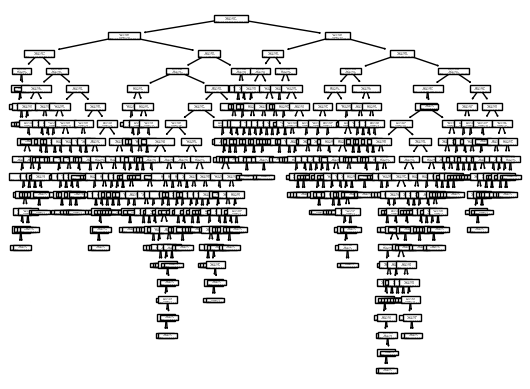

In [105]:
# Visualización del árbol de decisión
plot_tree(arbol)

In [107]:
# Realizar predicciones con los datos del test
predicciones = arbol.predict(X_test)

In [109]:
#Visualizar las predicciones
predicciones

array([6, 5, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 7, 5, 6, 6, 6, 5,
       6, 6, 5, 6, 5, 7, 5, 6, 6, 6, 6, 6, 7, 7, 5, 6, 6, 7, 5, 7, 5, 7,
       5, 5, 5, 6, 6, 6, 5, 4, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 7, 5, 6,
       5, 5, 5, 6, 6, 6, 4, 5, 6, 6, 5, 5, 5, 8, 6, 6, 6, 7, 6, 5, 4, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5,
       6, 6, 8, 6, 6, 6, 5, 7, 4, 6, 5, 6, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 8, 6, 5, 5, 5, 5, 6, 4,
       6, 6, 6, 7, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 4, 6,
       5, 7, 7, 5, 6, 8, 6, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 7, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 5, 6, 7, 6, 5, 7, 6, 5,
       5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 7, 7, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 4, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       6, 5, 5, 5, 5, 7, 6, 3, 6, 7, 5, 6, 7, 6, 6, 7, 5, 7, 3, 5, 6, 5,
       5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6,

In [113]:
#Métrica de exactitud del modelo
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.69375

In [115]:
# Métrica precisión del modelo
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.7007476530273575

In [117]:
# Métrica de sensibilidad
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.69375

In [119]:
# Métrica de f1 score, balance entre precision y recall 
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6962530570377558

In [111]:
# Evaluamos la precisión del modelo a partir de la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,2,0,0
4,0,4,2,4,1,0
5,2,3,101,26,3,0
6,0,3,27,99,12,1
7,0,0,1,5,18,3
8,0,0,0,2,1,0


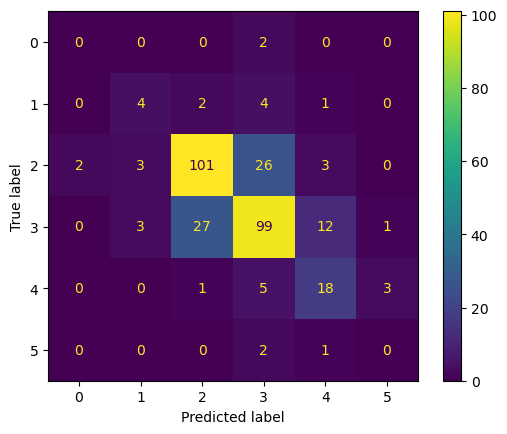

In [121]:
#Matrix de Confusión del modelo

cm=confusion_matrix(y_test,predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Interpretación de resultados

#### Métricas de Evaluación:

* ##### Accuracy: 69.38% 
   Esto significa que de todas las predicciones que hizo el modelo, acertó en el 69.38% de ellas. En otras palabras, de cada 100 vinos que el modelo evaluó, aproximadamente 69 fueron clasificados correctamente.

* ##### Precision: 70.07%
  Cuando el modelo dice que un vino tiene cierta calidad, el 70.07% de las veces tiene razón. Por ejemplo, si el modelo predice que un vino es de calidad 6, hay un 70.07% de probabilidades de que realmente sea así. 

* ##### Recall: 69.38%
  Esta métrica dice cuántos vinos de calidad real el modelo pudo identificar correctamente. Un ejemplo pueder ser que, de todos los vinos que realmente eran de calidad 5, el modelo logró identificarlos correctamente en un 69.38%.
  
* ##### F1 Score: 69.63%
  El F1 Score combina la precisión y el recall en un solo número. Este valor es útil porque muestra cómo se está desempeñando el modelo en general. En este caso, un 69.63% indica que el modelo tiene un buen equilibrio entre no cometer muchos errores (precisión) y encontrar la mayoría de los vinos correctos (recall).

#### Análisis de la matrix de confusión:
   * Los números en la diagonal (4, 101, 99, 18) muestran cuántas veces el modelo predijo correctamente la calidad del vino. Por ejemplo, predijo 101 veces que un vino tenía calidad 5 y acertó.
   * Los números fuera de la diagonal son los errores. Por ejemplo, el modelo pensó que 2 vinos de calidad 3 eran en realidad de calidad 5. Esto significa que el modelo tuvo dificultad para diferenciar esas calidades.

#### Conclusión:

El modelo de Árbol de decisión permite predecir la calidad del vino teniendo en cuenta las características descritas en el dataset. Sin embargo, aunque la escala de calidad va de 3 a 8, con los vinos de alta calidad (según la descripción de Kaggle) los cuales son los de valores mayores o iguales a 6, el modelo tiene limitaciones en sus predicciones.

En la matriz de confusión, observamos que la mayoría de las predicciones se concentran en los valores de vinos normales, entre 4 y 6, lo que permite evidenciar que el modelo tiene dificultades para predecir los vinos de calidad muy alta (7 y 8) y de calidad muy baja (3).